# Seminar 0 - Plotting in R
Basics and Introduction to making plots in R.

## Basic Plotting
Plotting some diamong data using the stock/inbuilt plotting capabilities of R

In [ ]:
set.seed(1289)

In [3]:
data(diamonds, package = "ggplot2")
summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

In [5]:
# randomly sample 20 observations per group defined by color & cut
df <- diamonds |> dplyr::slice_sample(n = 20, by = c(color, cut))

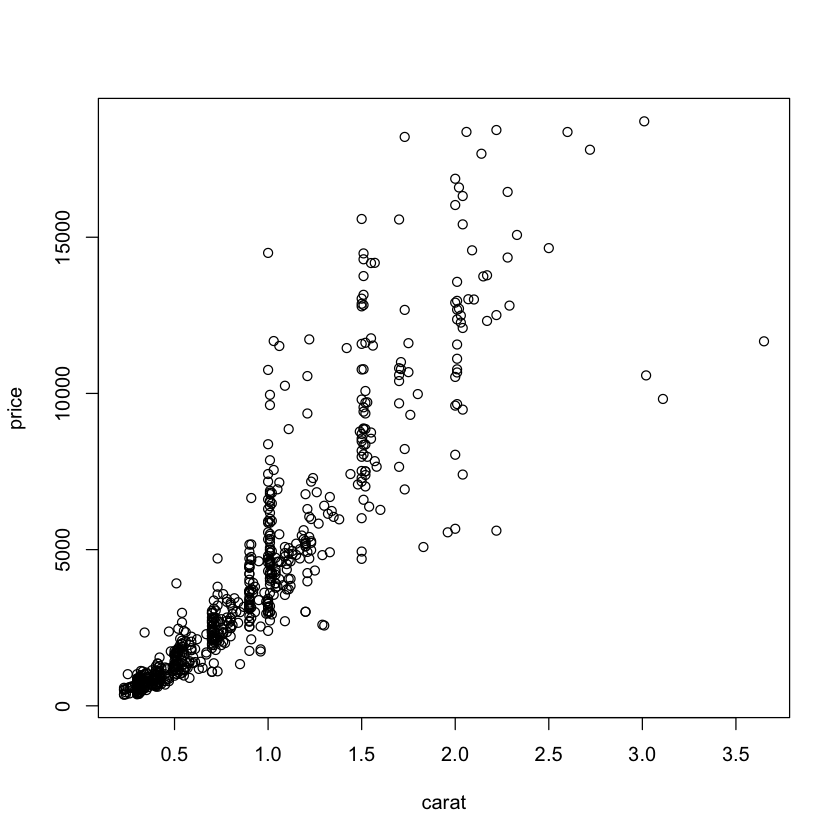

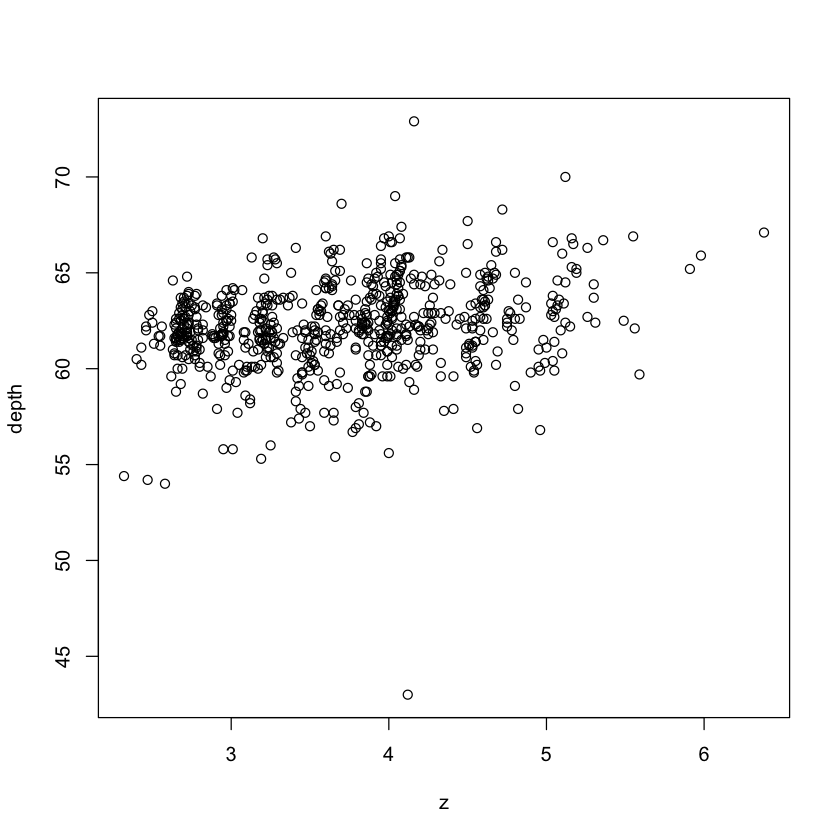

In [7]:
# Basic plots
plot(price ~ carat, data = df)
plot(depth ~ z, data = df)

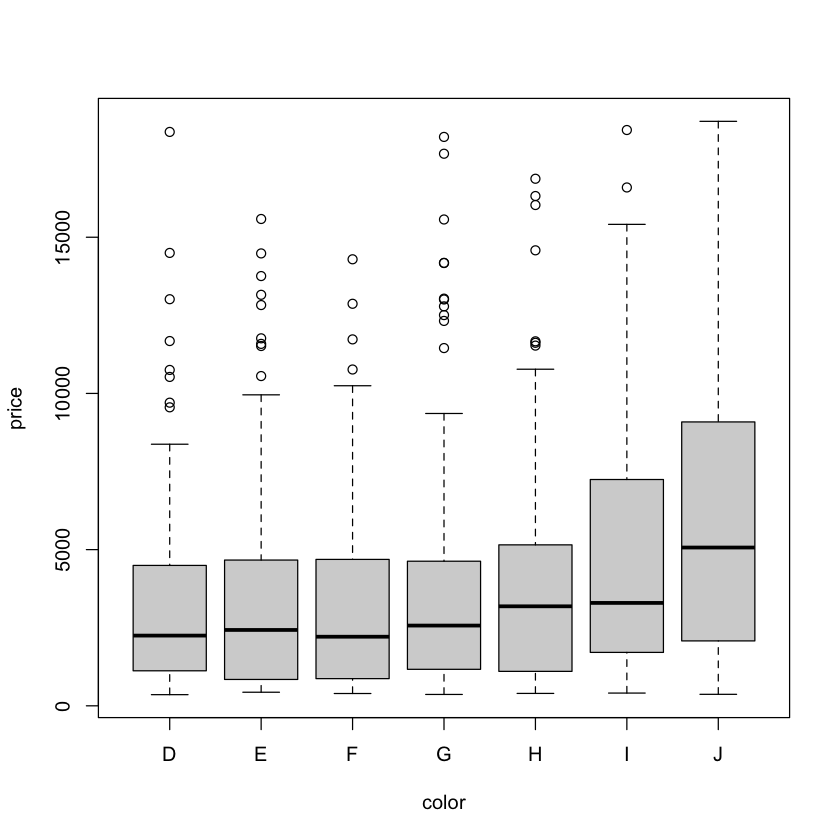

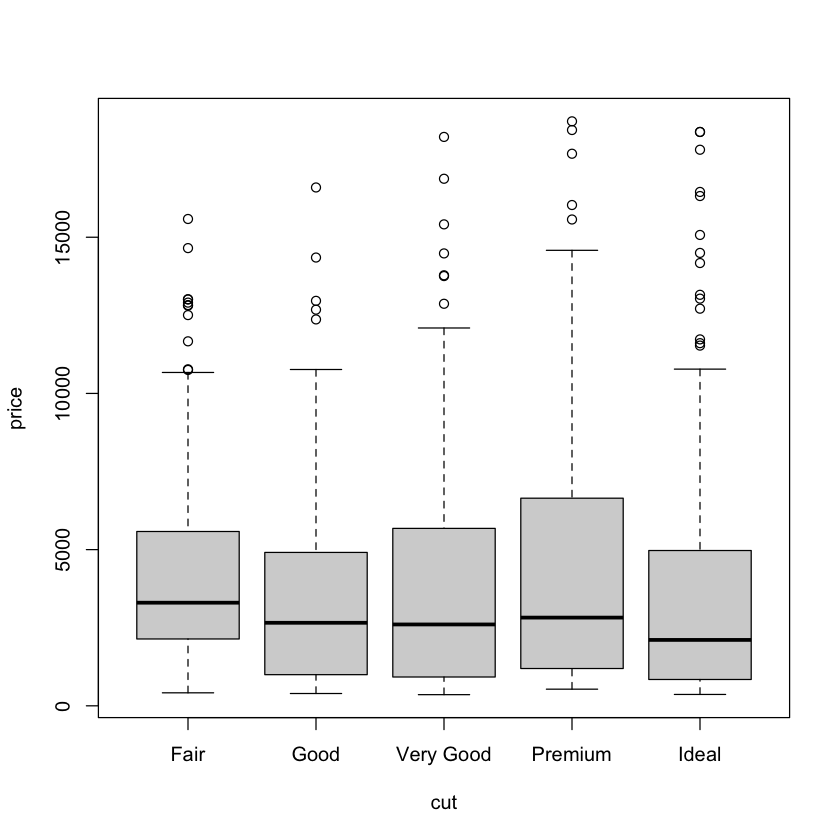

In [20]:
# Implicit boxplot
plot(price ~ color, data = df)

# Explicit boxplot
boxplot(price ~ cut, data = df)

## ggplot2
Using ggplot for more advanced plots

In [10]:
library("ggplot2")
set.seed(1289)

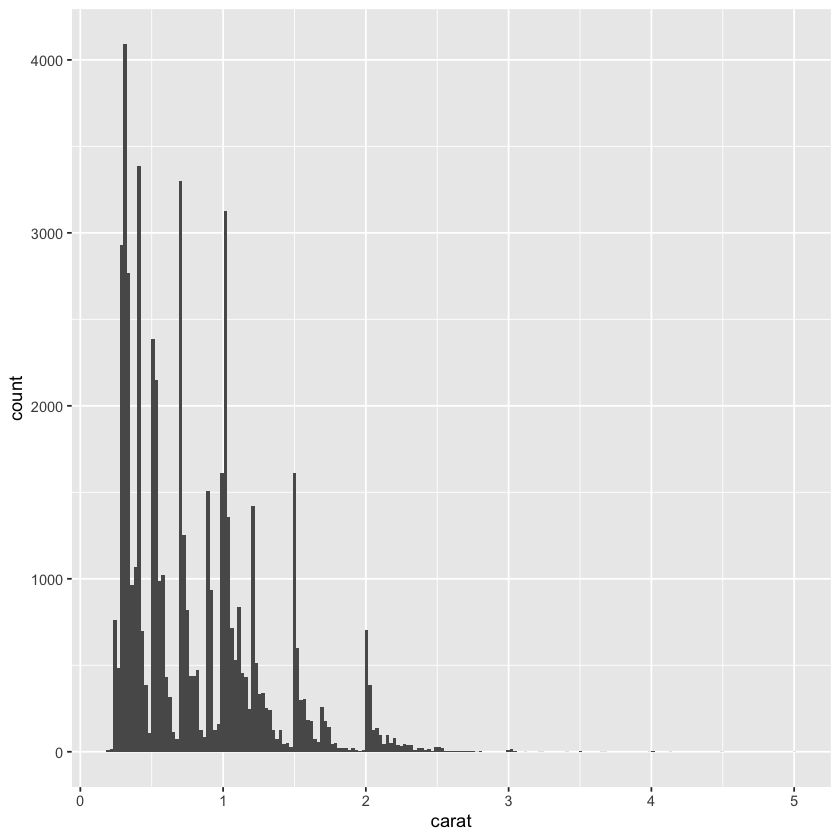

In [12]:
# Basic Histogram
ggplot(data = diamonds, mapping = aes(x = carat)) +
  geom_histogram(bins = 200)

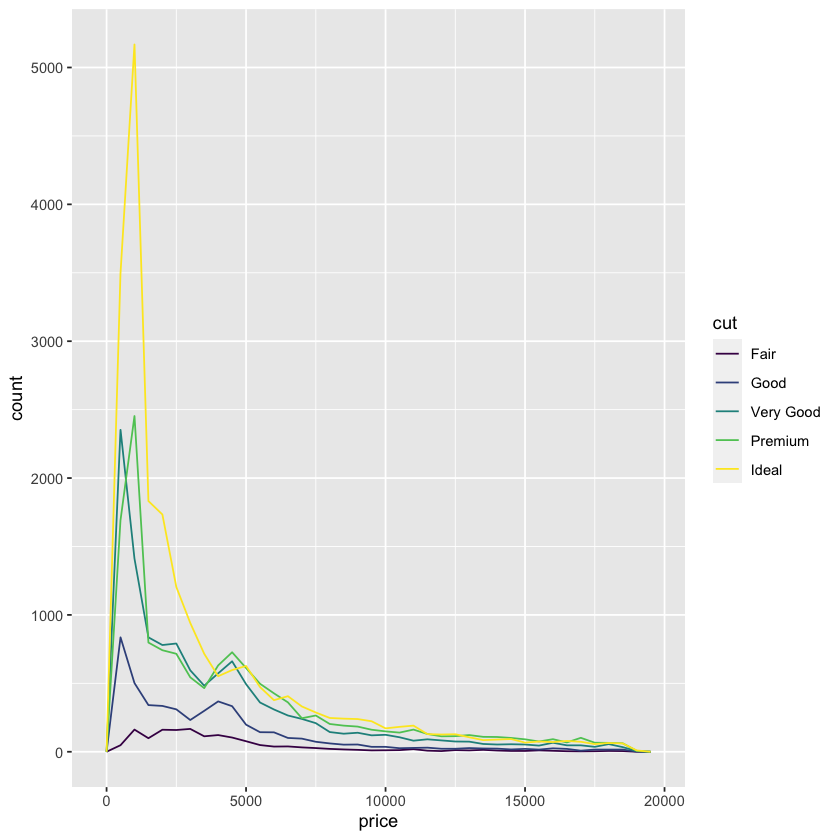

In [13]:
# Line Plot
ggplot(data = diamonds, mapping = aes(x = price, colour = cut)) +
  geom_freqpoly(binwidth = 500)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


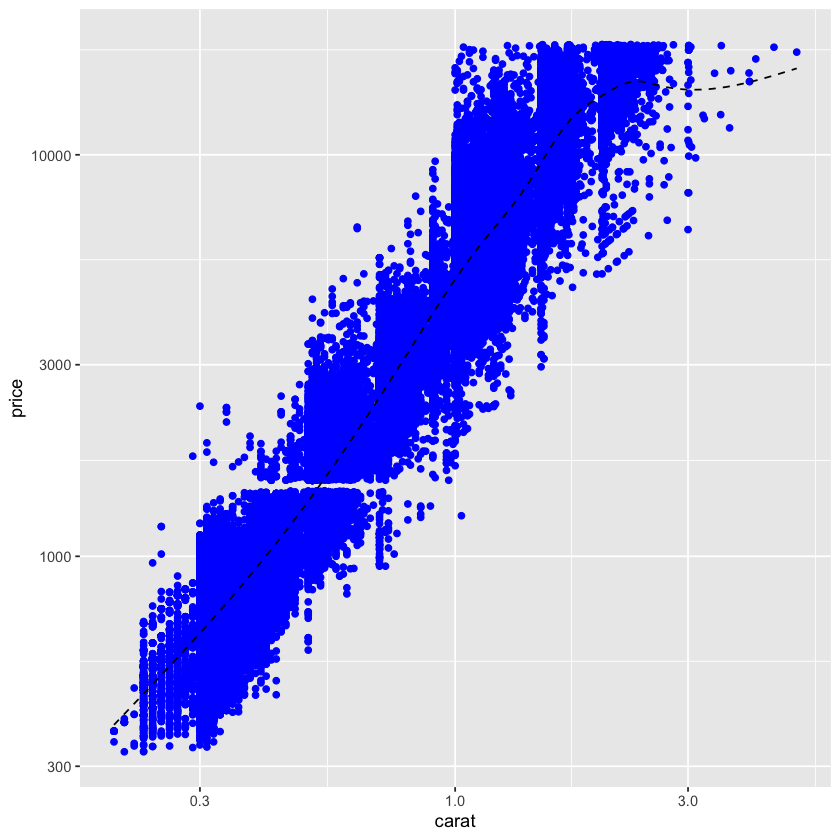

In [15]:
# Scatter Plot with best fit line and log scales
ggplot(data = diamonds, mapping = aes(x = carat, y = price)) +
  geom_point(colour = "blue") +
  geom_smooth(colour = "black", linetype = "dashed", size = 0.5, se = FALSE) +
  scale_x_log10() +
  scale_y_log10()

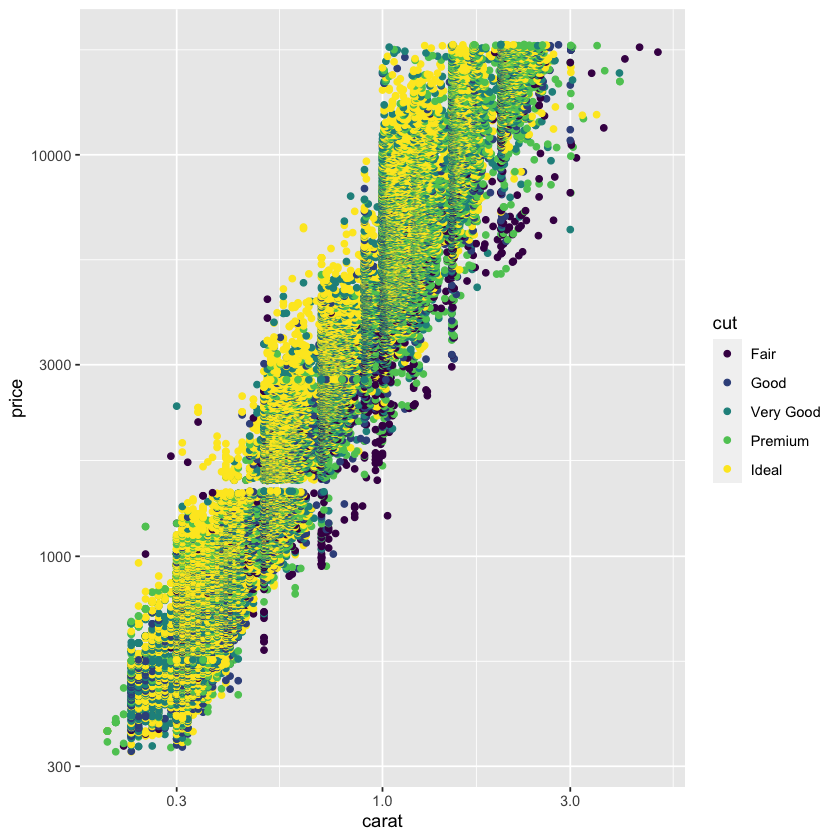

In [16]:
# Scatter Plot with categories and log scales
ggplot(data = diamonds, mapping = aes(x = carat, y = price, colour = cut)) +
  geom_point() +
  scale_x_log10() +
  scale_y_log10()

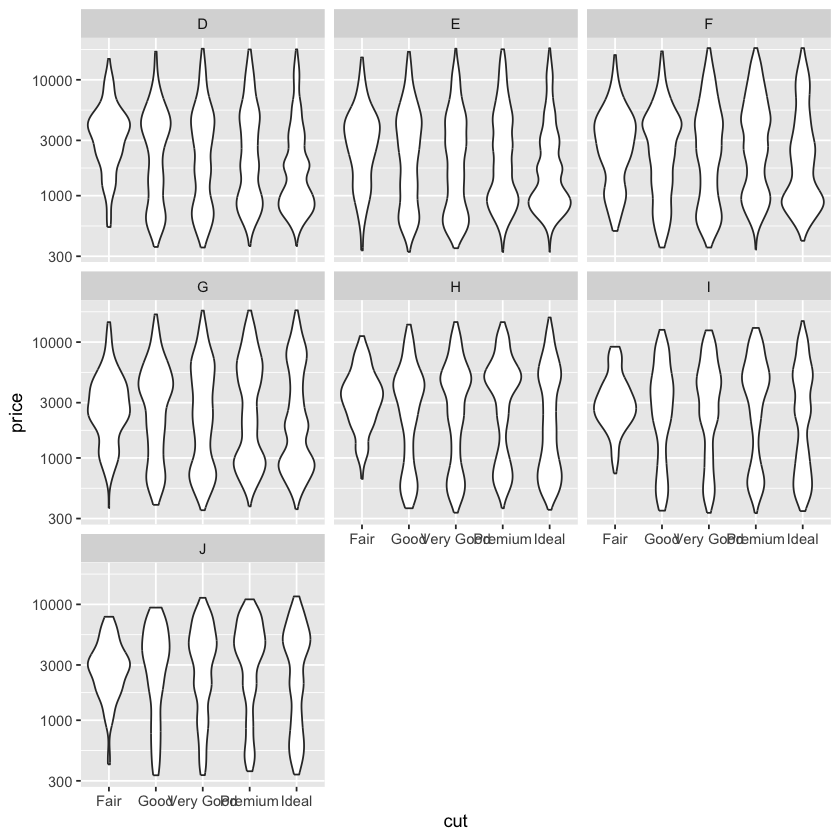

In [18]:
# Violin plots of diamond grades
diamonds |>
  dplyr::filter(carat < 1.75) |>
  ggplot(mapping = aes(x = cut, y = price)) +
  geom_violin() +
  scale_y_log10() +
  facet_wrap(facets = vars(color))

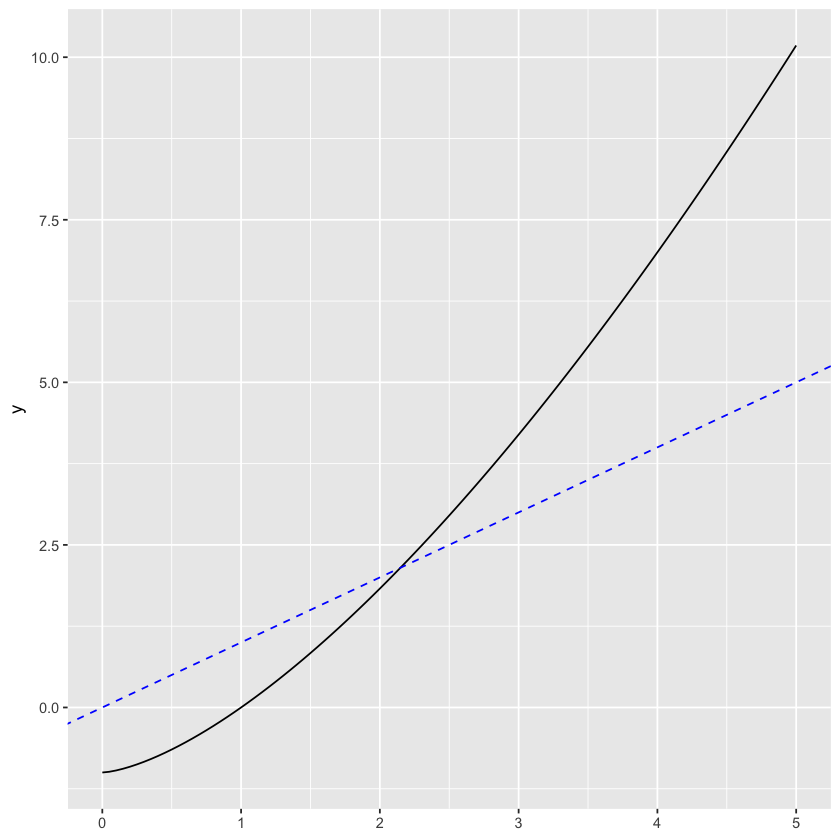

In [19]:
# Function plot
ggplot() +
  xlim(c(0, 5)) +
  geom_function(fun = \(x) sqrt(x) * x - 1) +
  geom_abline(intercept = 0, slope = 1, colour = "blue", linetype = "dashed")